In [220]:
#coding:utf-8
%reload_ext autoreload 
%autoreload 2
import os
import sys

project_basedir = '..'
sys.path.append(project_basedir)
from cchess_zero import cbf
from cchess_zero import board_visualizer
from matplotlib import pyplot as plt
import os
from cchess_zero.gameboard import *
from net import resnet
import common
from gameplays import gameplay,players
from gameplays.analysis import get_km_json
import json
%matplotlib inline
gpu_core = 6
import os
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_core)

In [221]:
!date

2018年 09月 13日 星期四 19:59:25 CST


In [554]:
! ls -l '../data/validate/2018-09-14_09-13-25_noup/' | tail

-rw-rw-r-- 1 meta meta  7528  9月 14 11:12 2018-09-14_11-12-51_560_mcts-mcts_newnet-oldnet_b.cbf
-rw-rw-r-- 1 meta meta  6128  9月 14 11:13 2018-09-14_11-13-39_225_mcts-mcts_newnet-oldnet_b.cbf
-rw-rw-r-- 1 meta meta  6953  9月 14 11:14 2018-09-14_11-14-24_808_mcts-mcts_oldnet-newnet_w.cbf
-rw-rw-r-- 1 meta meta  9128  9月 14 11:15 2018-09-14_11-15-06_117_mcts-mcts_newnet-oldnet_b.cbf
-rw-rw-r-- 1 meta meta  9203  9月 14 11:16 2018-09-14_11-16-40_175_mcts-mcts_newnet-oldnet_peace.cbf
-rw-rw-r-- 1 meta meta  8528  9月 14 11:17 2018-09-14_11-17-33_29_mcts-mcts_newnet-oldnet_peace.cbf
-rw-rw-r-- 1 meta meta  9953  9月 14 11:18 2018-09-14_11-18-35_227_mcts-mcts_newnet-oldnet_peace.cbf
-rw-rw-r-- 1 meta meta  9928  9月 14 11:19 2018-09-14_11-19-43_447_mcts-mcts_newnet-oldnet_b.cbf
-rw-rw-r-- 1 meta meta 12028  9月 14 11:21 2018-09-14_11-21-14_254_mcts-mcts_oldnet-newnet_peace.cbf
-rw-rw-r-- 1 meta meta 13528  9月 14 11:23 2018-09-14_11-23-35_770_mcts-mcts_newnet-oldnet_b.cbf


In [555]:
! ls -l '../data/validate/2018-09-11_21-13-25_noup/' | wc -l

220


In [556]:
! ls -l '../data/validate/2018-09-11_21-13-25_noup/' | grep peace | wc -l

68


In [570]:

fullpath = '../data/validate/2018-09-14_09-13-25_noup/2018-09-14_11-23-35_770_mcts-mcts_newnet-oldnet_b.cbf'
moves = cbf.cbf2move(fullpath)
fname = fullpath.split('/')[-1]
print(fname)
state = gameplay.GameState()

2018-09-14_11-23-35_770_mcts-mcts_newnet-oldnet_b.cbf


In [602]:
from PIL import Image
import imageio
imgs_for_gif = []
state = gameplay.GameState()
statestr = 'RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c1/9/rnbakabnr'
for i in moves[:-7]: 
    statestr = GameBoard.sim_do_action(i,statestr)
    imgs_for_gif.append(board_visualizer.get_board_img(statestr))
    state.do_move(i)
imgs_for_gif = imgs_for_gif[-20:]
imageio.mimsave('../data/gif/{}.gif'.format(fname[:-4]), imgs_for_gif,duration=0.5)

In [603]:
i,len(moves)

('b1c3', 505)

In [600]:
def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))

In [574]:
display_gif('../data/gif/{}.gif'.format(fname[:-4]))

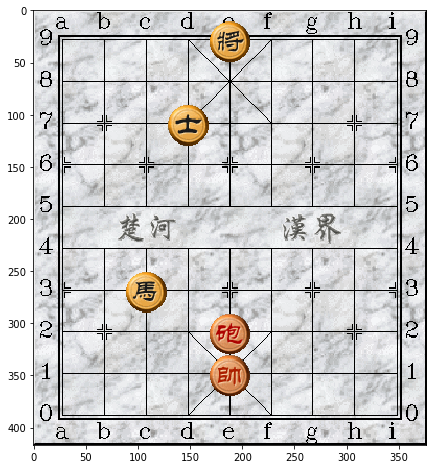

In [604]:
plt.figure(figsize=(8,8))
plt.imshow(board_visualizer.get_board_img(statestr))

# ANALYSIS

In [605]:
network = resnet.get_model(os.path.join(project_basedir,
    '../data/prepare_weight/2018-09-14_09-13-25_noup'[3:]),
    common.board.create_uci_labels(),GPU_CORE=[gpu_core],FILTERS=128,NUM_RES_LAYERS=7)

0
[None, 10, 9, 128]
[None, 10, 9, 128]
[None, 10, 9, 128]
[None, 10, 9, 128]
[None, 10, 9, 128]
[None, 10, 9, 128]
[None, 10, 9, 128]
inside res net [None, 10, 9, 128]
INFO:tensorflow:Restoring parameters from ../data/prepare_weight/2018-09-14_09-13-25_noup


In [623]:
network_player = players.NetworkPlayer(state.currentplayer,network,n_playout=15000)

In [624]:
network_player.make_move(state=state,actual_move=False)

('e2e6', -0.9362776860247195)

In [625]:
network_player.mcts_policy._root._Q

0.9362776860247195

In [626]:
childs = network_player.mcts_policy._root._children
probs = []
for move in childs:
    val = childs[move]
    print(move,val._n_visits,val._P,val._Q)
    probs.append(val._P)

e1d1 417 0.054466825 -1.0
e1f1 2277 0.093245886 -0.9167415005992159
e1e0 2251 0.09972456 -0.917317695192485
e2a2 344 0.0449259 -1.0
e2b2 134 0.017540345 -1.0
e2c2 1151 0.22408132 -1.0
e2d2 518 0.0676168 -1.0
e2f2 695 0.09072546 -1.0
e2g2 125 0.016399197 -1.0
e2h2 217 0.02830867 -1.0
e2i2 287 0.037443604 -1.0
e2e3 1132 0.041652896 -0.9243447502199632
e2e4 323 0.032812804 -0.9822280621011923
e2e5 2373 0.071797065 -0.8973115044545872
e2e6 1867 0.03685104 -0.9001754899880885
e2e7 483 0.01498512 -0.9388159455473127
e2e8 388 0.0046562604 -0.9277742672519588


In [628]:
datajson = get_km_json(network_player.mcts_policy,state.statestr,depth=5)

In [629]:
!mkdir '../data/mstc_vis'

mkdir: 无法创建目录"../data/mstc_vis": 文件已存在


In [630]:
with open('../data/mstc_vis/sample.km','w') as whdl:
    json.dump(datajson,whdl)